In [2]:
#import torch
import matplotlib.pyplot as plt
#import cv2
import pandas as pd

In [4]:
# Load the trained model 
model = torch.load('../deeplabv3-benchmark/weights.pt', map_location=torch.device('cpu'))
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [5]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('../deeplabv3-benchmark/log-100e.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

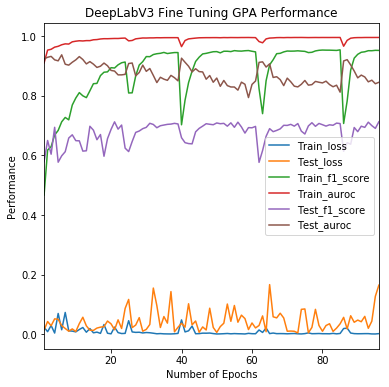

In [6]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(6,6));
plt.title('DeepLabV3 Fine Tuning GPA Performance')
plt.ylabel('Performance')
plt.xlabel('Number of Epochs')
plt.savefig('../deeplabv3-benchmark/performance-100e.pdf')

In [13]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.992382
Test_auroc     0.935902
dtype: float64


In [7]:
print(df[['Train_f1_score','Test_f1_score']].max())

Train_f1_score    0.953607
Test_f1_score     0.712517
dtype: float64


### Sample Prediction

In [32]:
ino = 2
model.cpu()
# Read  a sample image and mask from the data-set
img = cv2.imread(f'../../dataverse/sign-masks/deeplabv3_data/Image/b11_8_6.png').transpose(2,0,1).reshape(1,3,640,640)
mask = cv2.imread(f'../../dataverse/sign-masks/deeplabv3_data/Mask/b11_8_6_mask.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.FloatTensor)/255)

(array([3.9977e+05, 5.8600e+02, 4.8800e+02, 4.3400e+02, 3.8900e+02,
        4.0200e+02, 3.7300e+02, 3.8800e+02, 5.5900e+02, 6.2110e+03]),
 array([-0.0305239 ,  0.07252849,  0.17558088,  0.27863327,  0.38168566,
         0.48473805,  0.58779044,  0.69084283,  0.79389522,  0.89694761,
         1.        ]),
 <a list of 10 Patch objects>)

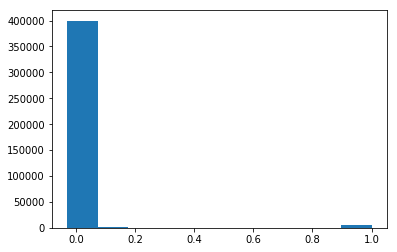

In [33]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

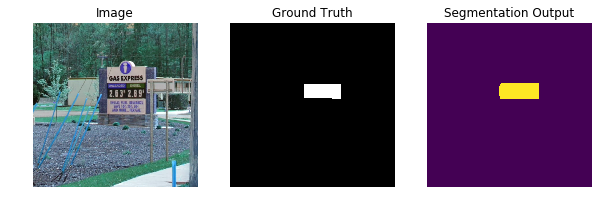

In [40]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.1);
plt.title('Segmentation Output')
plt.axis('off');
plt.savefig('../deeplabv3-benchmark/output-segmentation.pdf',bbox_inches='tight')